<a href="https://colab.research.google.com/github/AdrienVansuyt/Python-Quant-Exercices/blob/main/Quantitative_Momentum_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detailed Example: Course 6 - Quantitative Momentum Trading Strategies**
## **Introduction**

Momentum trading strategies exploit the tendency of stocks to exhibit persistence in their price movements. The idea is to buy assets that have performed well in the past and sell those that have performed poorly, under the assumption that these trends will continue.

## **Scripts**

**Implementing a Momentum Trading Strategy**

[*********************100%%**********************]  10 of 10 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


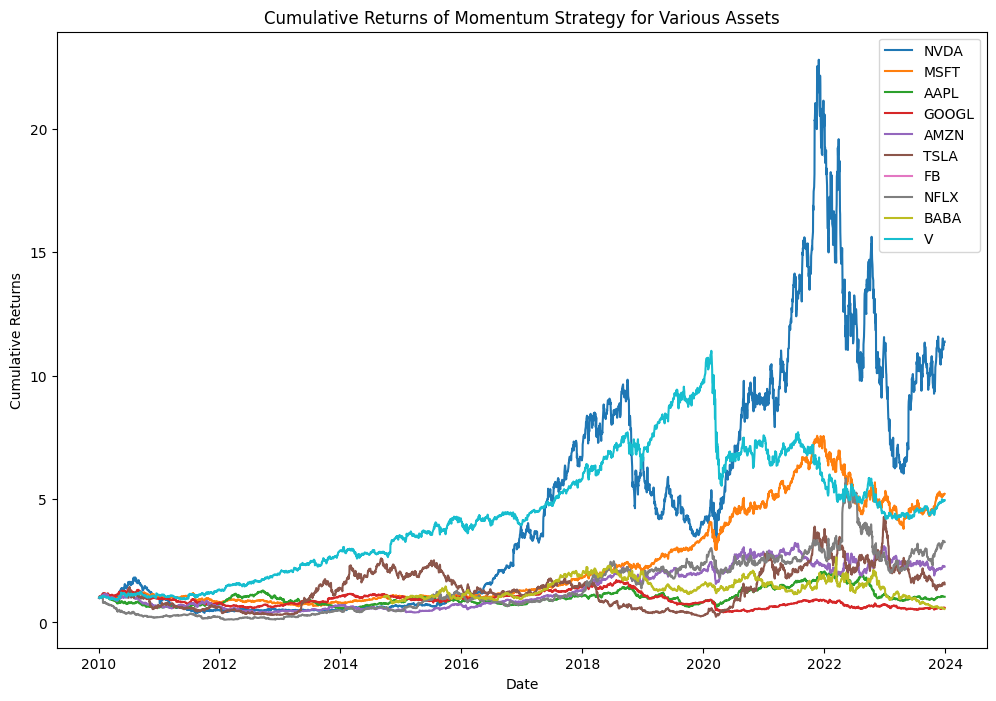

The most profitable asset for the momentum strategy is NVDA with a cumulative return of 11.38.


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Liste d'actifs à analyser
tickers = ['NVDA', 'MSFT', 'AAPL', 'GOOGL', 'AMZN', 'TSLA', 'FB', 'NFLX', 'BABA', 'V']

# Télécharger les données historiques pour les actifs
data = yf.download(tickers, start='2010-01-01', end='2024-01-01')['Adj Close']

# Calculer les rendements et les indicateurs de momentum
returns = data.pct_change()
momentum = data.pct_change(252)

# Initialiser un DataFrame pour les rendements cumulés des stratégies
cumulative_strategy_returns = pd.DataFrame(index=data.index)

# Appliquer la stratégie de momentum sur chaque actif
for ticker in tickers:
    signal = np.where(momentum[ticker] > 0, 1, -1)
    strategy_returns = signal[:-1] * returns[ticker].iloc[1:]
    cumulative_strategy_returns[ticker] = (strategy_returns + 1).cumprod()

# Visualiser les rendements cumulés des stratégies de momentum pour chaque actif
plt.figure(figsize=(12, 8))

for ticker in tickers:
    plt.plot(cumulative_strategy_returns[ticker], label=ticker)

plt.title('Cumulative Returns of Momentum Strategy for Various Assets')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Trouver l'actif avec les rendements cumulés les plus élevés
best_asset = cumulative_strategy_returns.iloc[-1].idxmax()
best_cumulative_return = cumulative_strategy_returns.iloc[-1].max()

print(f"The most profitable asset for the momentum strategy is {best_asset} with a cumulative return of {best_cumulative_return:.2f}.")


# **Interpretation**
This script downloads historical data for several assets, applies the momentum strategy to each of them, and calculates the cumulative returns. It then visualises the cumulative returns of the momentum strategies for each asset and identifies the most profitable asset.

**Example of how to interpret the results**

- NVDA: Cumulative returns of the momentum strategy for Nvidia.
- MSFT: Cumulative returns of the momentum strategy for Microsoft.
- AAPL: Cumulative returns of the momentum strategy for Apple.
- GOOGL: Cumulative returns on the momentum strategy for Alphabet (Google).
- AMZN: Cumulative returns on the momentum strategy for Amazon.
- TSLA: Cumulative returns of the Tesla momentum strategy.
- FB: Cumulative returns on the momentum strategy for Meta Platforms (Facebook).
- NFLX: Cumulative returns on the momentum strategy for Netflix.
- BABA: Cumulative returns of the momentum strategy for Alibaba.
- V: Cumulative returns on the momentum strategy for Visa.
# **Conclusion**
By applying the momentum strategy to several assets, we can identify the one that offers the best cumulative returns. This allows us to choose better-performing assets for our trading strategy. Based on the results of the script, the most profitable asset for the momentum strategy will be displayed with its cumulative returns. You can adapt the list of assets to suit your preferences and investment objectives.

